In [27]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import os


In [1]:
# Unzip the downloaded dataset
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/flowers.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
# Dataset Path
base_dir = '/content/drive/MyDrive/flowers'
img_size = 224
batch = 64

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    subset='training',
    batch_size=batch,
    class_mode='categorical'
)

test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    subset='validation',
    batch_size=batch ,
    class_mode='categorical'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [32]:
model = Sequential([
    Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes for categorical classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

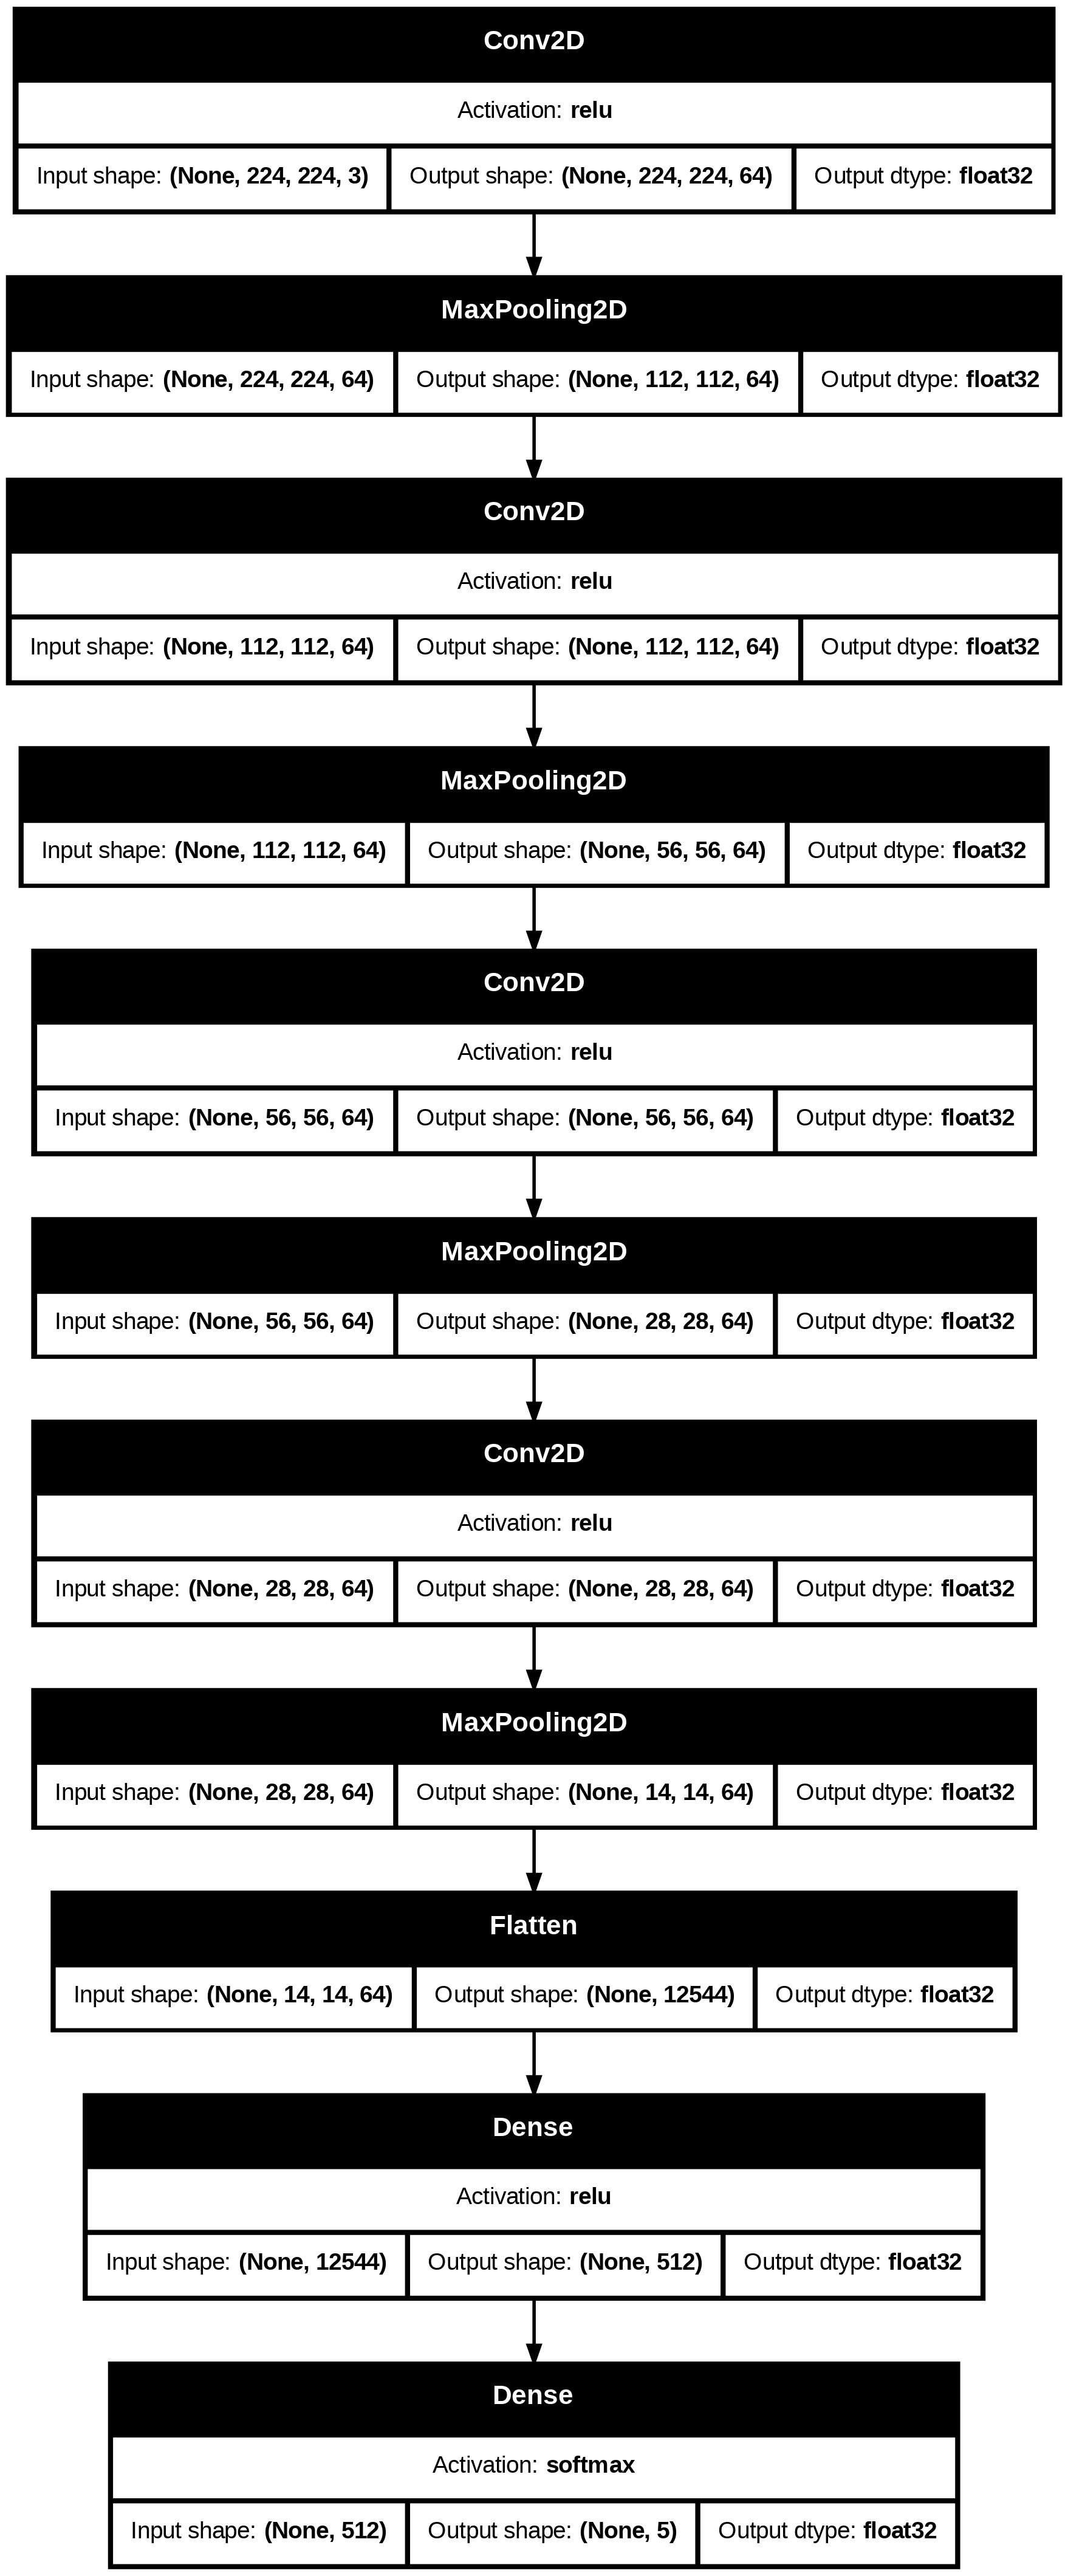

In [34]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# model.fit(train_datagen,epochs=30,validation_data=test_datagen)
history = model.fit(
    train_datagen,
    epochs=30,
    validation_data=test_datagen
)
    # callbacks=[early_stopping, reduce_lr]


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.3032 - loss: 1.5573 - val_accuracy: 0.4512 - val_loss: 1.2930
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5004 - loss: 1.2131 - val_accuracy: 0.5651 - val_loss: 1.0929
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5960 - loss: 1.0512 - val_accuracy: 0.5826 - val_loss: 1.0443
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6245 - loss: 0.9758 - val_accuracy: 0.6360 - val_loss: 0.9587
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6338 - loss: 0.9516 - val_accuracy: 0.5628 - val_loss: 1.0772
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6388 - loss: 0.9709 - val_accuracy: 0.6500 - val_loss: 0.9348
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6825 - loss: 0.8223 - val_accuracy: 0.6581 - val_loss: 0.9007
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6772 - loss: 0.8441 - val_accuracy: 0.6616 - val_loss: 0.8982
Epo

In [37]:
model.save('drive/MyDrive/flowers_model.h5')

In [42]:
from tensorflow.keras.models import load_model
model.save('flowers_model.h5')



In [43]:
# load model
from tensorflow.keras.models import load_model


savedModel=load_model('flowers_model.h5')

In [44]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [49]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Dandelion','Rose','sunflower', 'tulip']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0. 0. 1. 0. 0.]]
Rose


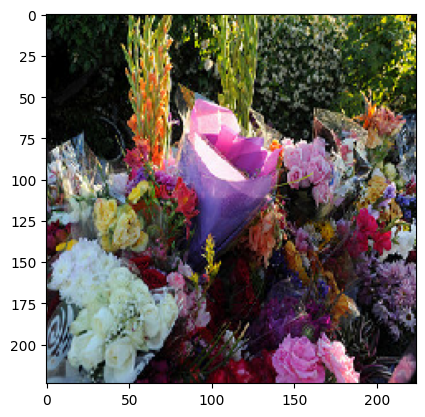

In [50]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/flowers/rose/10894627425_ec76bbc757_n.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0. 1. 0. 0. 0.]]
Dandelion


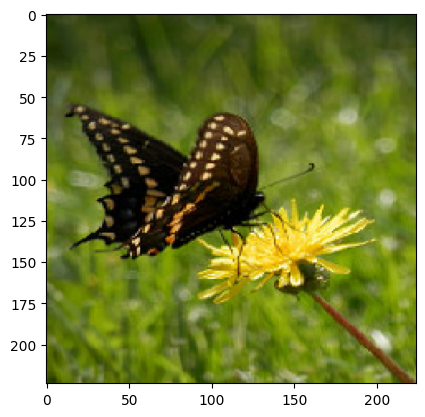

In [51]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0. 0. 0. 0. 1.]]
tulip


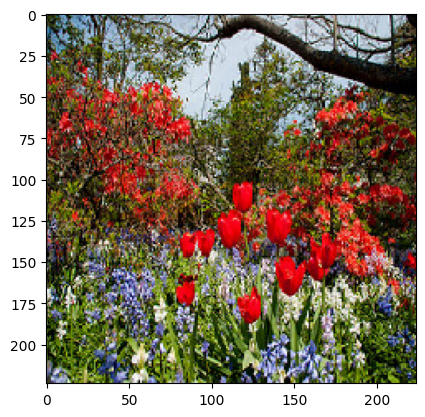

In [52]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/flowers/tulip/10163955604_ae0b830975_n.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break